# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras
import itertools

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
            
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    
    return model

In [6]:
## 超參數設定
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
OPTIMIZER = [keras.optimizers.SGD, keras.optimizers.RMSprop, keras.optimizers.Adagrad, keras.optimizers.Adam]
#MOMENTUM = [0.7, 0.9, 0.95, 0.99]

In [7]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""

for lr, opti in itertools.product(LEARNING_RATE, OPTIMIZER):
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f, Optimizer = %s" % (lr, opti))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = opti(lr=lr)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s-opti-%s" % (str(lr), str(opti))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with LR = 0.100000, Optimizer = <class 'tensorflow.python.keras.optimizer_v2.gradient_descent.SGD'>
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Epoch 

196/196 [==============================] - 4s 19ms/step - loss: 0.7481 - accuracy: 0.7348 - val_loss: 1.8997 - val_accuracy: 0.4658
Experiment with LR = 0.100000, Optimizer = <class 'tensorflow.python.keras.optimizer_v2.rmsprop.RMSprop'>
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,8

196/196 [==============================] - 5s 28ms/step - loss: 2.3076 - accuracy: 0.1021 - val_loss: 2.3126 - val_accuracy: 0.1000
Epoch 50/50
196/196 [==============================] - 6s 29ms/step - loss: 2.3082 - accuracy: 0.0992 - val_loss: 2.3151 - val_accuracy: 0.1000
Experiment with LR = 0.100000, Optimizer = <class 'tensorflow.python.keras.optimizer_v2.adagrad.Adagrad'>
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________

196/196 [==============================] - 3s 18ms/step - loss: 0.8170 - accuracy: 0.7066 - val_loss: 1.7417 - val_accuracy: 0.4689
Epoch 49/50
196/196 [==============================] - 3s 17ms/step - loss: 0.8040 - accuracy: 0.7116 - val_loss: 1.7597 - val_accuracy: 0.4796
Epoch 50/50
196/196 [==============================] - 3s 17ms/step - loss: 0.7898 - accuracy: 0.7152 - val_loss: 1.7409 - val_accuracy: 0.4840
Experiment with LR = 0.100000, Optimizer = <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
___

196/196 [==============================] - 4s 19ms/step - loss: 2.3073 - accuracy: 0.0974 - val_loss: 2.3052 - val_accuracy: 0.1000
Epoch 48/50
196/196 [==============================] - 4s 18ms/step - loss: 2.3066 - accuracy: 0.1004 - val_loss: 2.3068 - val_accuracy: 0.1000
Epoch 49/50
196/196 [==============================] - 4s 18ms/step - loss: 2.3066 - accuracy: 0.0989 - val_loss: 2.3049 - val_accuracy: 0.1000
Epoch 50/50
196/196 [==============================] - 4s 18ms/step - loss: 2.3067 - accuracy: 0.1000 - val_loss: 2.3063 - val_accuracy: 0.1000
Experiment with LR = 0.010000, Optimizer = <class 'tensorflow.python.keras.optimizer_v2.gradient_descent.SGD'>
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)      

196/196 [==============================] - 3s 15ms/step - loss: 1.2603 - accuracy: 0.5595 - val_loss: 1.4723 - val_accuracy: 0.4708
Epoch 47/50
196/196 [==============================] - 3s 15ms/step - loss: 1.2551 - accuracy: 0.5596 - val_loss: 1.4129 - val_accuracy: 0.4925
Epoch 48/50
196/196 [==============================] - 3s 15ms/step - loss: 1.2451 - accuracy: 0.5610 - val_loss: 1.4030 - val_accuracy: 0.4990
Epoch 49/50
196/196 [==============================] - 3s 16ms/step - loss: 1.2415 - accuracy: 0.5635 - val_loss: 1.3593 - val_accuracy: 0.5104
Epoch 50/50
196/196 [==============================] - 3s 15ms/step - loss: 1.2314 - accuracy: 0.5672 - val_loss: 1.4343 - val_accuracy: 0.4858
Experiment with LR = 0.010000, Optimizer = <class 'tensorflow.python.keras.optimizer_v2.rmsprop.RMSprop'>
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 30

196/196 [==============================] - 6s 28ms/step - loss: 1.8326 - accuracy: 0.3229 - val_loss: 1.9245 - val_accuracy: 0.2695
Epoch 46/50
196/196 [==============================] - 6s 28ms/step - loss: 1.8300 - accuracy: 0.3214 - val_loss: 1.9402 - val_accuracy: 0.2865
Epoch 47/50
196/196 [==============================] - 6s 29ms/step - loss: 1.8282 - accuracy: 0.3244 - val_loss: 1.8752 - val_accuracy: 0.2939
Epoch 48/50
196/196 [==============================] - 6s 29ms/step - loss: 1.8274 - accuracy: 0.3200 - val_loss: 1.8061 - val_accuracy: 0.3301
Epoch 49/50
196/196 [==============================] - 6s 29ms/step - loss: 1.8240 - accuracy: 0.3221 - val_loss: 1.8255 - val_accuracy: 0.3226
Epoch 50/50
196/196 [==============================] - 6s 28ms/step - loss: 1.8221 - accuracy: 0.3231 - val_loss: 1.8948 - val_accuracy: 0.3012
Experiment with LR = 0.010000, Optimizer = <class 'tensorflow.python.keras.optimizer_v2.adagrad.Adagrad'>
Model: "model"
___________________________

196/196 [==============================] - 4s 20ms/step - loss: 1.0769 - accuracy: 0.6238 - val_loss: 1.4813 - val_accuracy: 0.4816
Epoch 45/50
196/196 [==============================] - 4s 18ms/step - loss: 1.0629 - accuracy: 0.6295 - val_loss: 1.4216 - val_accuracy: 0.5009
Epoch 46/50
196/196 [==============================] - 4s 18ms/step - loss: 1.0517 - accuracy: 0.6324 - val_loss: 1.4150 - val_accuracy: 0.4977
Epoch 47/50
196/196 [==============================] - 5s 24ms/step - loss: 1.0430 - accuracy: 0.6349 - val_loss: 1.3764 - val_accuracy: 0.5129
Epoch 48/50
196/196 [==============================] - 5s 25ms/step - loss: 1.0352 - accuracy: 0.6394 - val_loss: 1.4569 - val_accuracy: 0.4847
Epoch 49/50
196/196 [==============================] - 3s 18ms/step - loss: 1.0304 - accuracy: 0.6407 - val_loss: 1.4084 - val_accuracy: 0.5102
Epoch 50/50
196/196 [==============================] - 3s 18ms/step - loss: 1.0132 - accuracy: 0.6483 - val_loss: 1.4933 - val_accuracy: 0.4938
Expe

196/196 [==============================] - 3s 18ms/step - loss: 1.5398 - accuracy: 0.4487 - val_loss: 1.6151 - val_accuracy: 0.4260
Epoch 44/50
196/196 [==============================] - 3s 18ms/step - loss: 1.5312 - accuracy: 0.4507 - val_loss: 1.6024 - val_accuracy: 0.4256
Epoch 45/50
196/196 [==============================] - 4s 18ms/step - loss: 1.5379 - accuracy: 0.4485 - val_loss: 1.6232 - val_accuracy: 0.4268
Epoch 46/50
196/196 [==============================] - 3s 18ms/step - loss: 1.5451 - accuracy: 0.4441 - val_loss: 1.6065 - val_accuracy: 0.4210
Epoch 47/50
196/196 [==============================] - 3s 18ms/step - loss: 1.5291 - accuracy: 0.4497 - val_loss: 1.6226 - val_accuracy: 0.4254
Epoch 48/50
196/196 [==============================] - 4s 18ms/step - loss: 1.5389 - accuracy: 0.4487 - val_loss: 1.5981 - val_accuracy: 0.4317
Epoch 49/50
196/196 [==============================] - 4s 18ms/step - loss: 1.5343 - accuracy: 0.4474 - val_loss: 1.6498 - val_accuracy: 0.4129
Epoc

196/196 [==============================] - 3s 18ms/step - loss: 1.7182 - accuracy: 0.3991 - val_loss: 1.7235 - val_accuracy: 0.3922
Epoch 43/50
196/196 [==============================] - 4s 18ms/step - loss: 1.7147 - accuracy: 0.3996 - val_loss: 1.7182 - val_accuracy: 0.4003
Epoch 44/50
196/196 [==============================] - 3s 18ms/step - loss: 1.7108 - accuracy: 0.4021 - val_loss: 1.7153 - val_accuracy: 0.4004
Epoch 45/50
196/196 [==============================] - 3s 16ms/step - loss: 1.7069 - accuracy: 0.4039 - val_loss: 1.7136 - val_accuracy: 0.3961
Epoch 46/50
196/196 [==============================] - 3s 16ms/step - loss: 1.7034 - accuracy: 0.4038 - val_loss: 1.7095 - val_accuracy: 0.3995
Epoch 47/50
196/196 [==============================] - 3s 17ms/step - loss: 1.7001 - accuracy: 0.4063 - val_loss: 1.7044 - val_accuracy: 0.4030
Epoch 48/50
196/196 [==============================] - 3s 17ms/step - loss: 1.6963 - accuracy: 0.4069 - val_loss: 1.7020 - val_accuracy: 0.4042
Epoc

196/196 [==============================] - 6s 32ms/step - loss: 0.8769 - accuracy: 0.6850 - val_loss: 1.8322 - val_accuracy: 0.4874
Epoch 42/50
196/196 [==============================] - 6s 30ms/step - loss: 0.8625 - accuracy: 0.6886 - val_loss: 1.8731 - val_accuracy: 0.4803
Epoch 43/50
196/196 [==============================] - 6s 31ms/step - loss: 0.8482 - accuracy: 0.6963 - val_loss: 1.8415 - val_accuracy: 0.4776
Epoch 44/50
196/196 [==============================] - 6s 30ms/step - loss: 0.8407 - accuracy: 0.6963 - val_loss: 1.8148 - val_accuracy: 0.4628
Epoch 45/50
196/196 [==============================] - 6s 29ms/step - loss: 0.8245 - accuracy: 0.7000 - val_loss: 1.8359 - val_accuracy: 0.4898
Epoch 46/50
196/196 [==============================] - 6s 29ms/step - loss: 0.8111 - accuracy: 0.7109 - val_loss: 1.7454 - val_accuracy: 0.4924
Epoch 47/50
196/196 [==============================] - 6s 29ms/step - loss: 0.7974 - accuracy: 0.7135 - val_loss: 1.9177 - val_accuracy: 0.4739
Epoc

196/196 [==============================] - 5s 25ms/step - loss: 1.5555 - accuracy: 0.4569 - val_loss: 1.5829 - val_accuracy: 0.4430
Epoch 41/50
196/196 [==============================] - 5s 28ms/step - loss: 1.5511 - accuracy: 0.4587 - val_loss: 1.5781 - val_accuracy: 0.4399
Epoch 42/50
196/196 [==============================] - 4s 20ms/step - loss: 1.5472 - accuracy: 0.4603 - val_loss: 1.5781 - val_accuracy: 0.4444
Epoch 43/50
196/196 [==============================] - 4s 21ms/step - loss: 1.5424 - accuracy: 0.4642 - val_loss: 1.5756 - val_accuracy: 0.4501
Epoch 44/50
196/196 [==============================] - 4s 20ms/step - loss: 1.5378 - accuracy: 0.4647 - val_loss: 1.5633 - val_accuracy: 0.4512
Epoch 45/50
196/196 [==============================] - 4s 19ms/step - loss: 1.5339 - accuracy: 0.4660 - val_loss: 1.5578 - val_accuracy: 0.4507
Epoch 46/50
196/196 [==============================] - 4s 18ms/step - loss: 1.5294 - accuracy: 0.4681 - val_loss: 1.5615 - val_accuracy: 0.4517
Epoc

196/196 [==============================] - 4s 19ms/step - loss: 0.8105 - accuracy: 0.7094 - val_loss: 1.6223 - val_accuracy: 0.5073
Epoch 40/50
196/196 [==============================] - 4s 19ms/step - loss: 0.7975 - accuracy: 0.7156 - val_loss: 1.5577 - val_accuracy: 0.5290
Epoch 41/50
196/196 [==============================] - 4s 19ms/step - loss: 0.7866 - accuracy: 0.7194 - val_loss: 1.5595 - val_accuracy: 0.5223
Epoch 42/50
196/196 [==============================] - 4s 19ms/step - loss: 0.7653 - accuracy: 0.7257 - val_loss: 1.6227 - val_accuracy: 0.5180
Epoch 43/50
196/196 [==============================] - 4s 20ms/step - loss: 0.7613 - accuracy: 0.7284 - val_loss: 1.6418 - val_accuracy: 0.5147
Epoch 44/50
196/196 [==============================] - 4s 19ms/step - loss: 0.7378 - accuracy: 0.7368 - val_loss: 1.6510 - val_accuracy: 0.5207
Epoch 45/50
196/196 [==============================] - 4s 19ms/step - loss: 0.7319 - accuracy: 0.7380 - val_loss: 1.6666 - val_accuracy: 0.5167
Epoc

196/196 [==============================] - 3s 16ms/step - loss: 2.0864 - accuracy: 0.2793 - val_loss: 2.0871 - val_accuracy: 0.2793
Epoch 39/50
196/196 [==============================] - 3s 17ms/step - loss: 2.0828 - accuracy: 0.2806 - val_loss: 2.0835 - val_accuracy: 0.2808
Epoch 40/50
196/196 [==============================] - 3s 15ms/step - loss: 2.0792 - accuracy: 0.2811 - val_loss: 2.0800 - val_accuracy: 0.2808
Epoch 41/50
196/196 [==============================] - 3s 15ms/step - loss: 2.0757 - accuracy: 0.2822 - val_loss: 2.0765 - val_accuracy: 0.2830
Epoch 42/50
196/196 [==============================] - 3s 15ms/step - loss: 2.0722 - accuracy: 0.2836 - val_loss: 2.0731 - val_accuracy: 0.2842
Epoch 43/50
196/196 [==============================] - 3s 15ms/step - loss: 2.0688 - accuracy: 0.2855 - val_loss: 2.0696 - val_accuracy: 0.2848
Epoch 44/50
196/196 [==============================] - 3s 15ms/step - loss: 2.0654 - accuracy: 0.2860 - val_loss: 2.0663 - val_accuracy: 0.2852
Epoc

196/196 [==============================] - 6s 30ms/step - loss: 1.0924 - accuracy: 0.6182 - val_loss: 1.3622 - val_accuracy: 0.5198
Epoch 38/50
196/196 [==============================] - 6s 30ms/step - loss: 1.0811 - accuracy: 0.6248 - val_loss: 1.4220 - val_accuracy: 0.4993
Epoch 39/50
196/196 [==============================] - 6s 30ms/step - loss: 1.0712 - accuracy: 0.6304 - val_loss: 1.4483 - val_accuracy: 0.4942
Epoch 40/50
196/196 [==============================] - 6s 30ms/step - loss: 1.0588 - accuracy: 0.6324 - val_loss: 1.4217 - val_accuracy: 0.5091
Epoch 41/50
196/196 [==============================] - 7s 34ms/step - loss: 1.0523 - accuracy: 0.6345 - val_loss: 1.4109 - val_accuracy: 0.5112
Epoch 42/50
196/196 [==============================] - 6s 32ms/step - loss: 1.0396 - accuracy: 0.6382 - val_loss: 1.4185 - val_accuracy: 0.5020
Epoch 43/50
196/196 [==============================] - 6s 30ms/step - loss: 1.0285 - accuracy: 0.6419 - val_loss: 1.4234 - val_accuracy: 0.5131
Epoc

196/196 [==============================] - 3s 18ms/step - loss: 1.9107 - accuracy: 0.3355 - val_loss: 1.9099 - val_accuracy: 0.3345
Epoch 37/50
196/196 [==============================] - 3s 18ms/step - loss: 1.9071 - accuracy: 0.3369 - val_loss: 1.9064 - val_accuracy: 0.3362
Epoch 38/50
196/196 [==============================] - 3s 17ms/step - loss: 1.9035 - accuracy: 0.3377 - val_loss: 1.9029 - val_accuracy: 0.3384
Epoch 39/50
196/196 [==============================] - 3s 18ms/step - loss: 1.9001 - accuracy: 0.3382 - val_loss: 1.8996 - val_accuracy: 0.3393
Epoch 40/50
196/196 [==============================] - 3s 18ms/step - loss: 1.8967 - accuracy: 0.3401 - val_loss: 1.8964 - val_accuracy: 0.3409
Epoch 41/50
196/196 [==============================] - 3s 18ms/step - loss: 1.8935 - accuracy: 0.3404 - val_loss: 1.8933 - val_accuracy: 0.3407
Epoch 42/50
196/196 [==============================] - 3s 17ms/step - loss: 1.8903 - accuracy: 0.3422 - val_loss: 1.8905 - val_accuracy: 0.3437
Epoc

196/196 [==============================] - 4s 19ms/step - loss: 0.9821 - accuracy: 0.6585 - val_loss: 1.3640 - val_accuracy: 0.5314
Epoch 36/50
196/196 [==============================] - 4s 19ms/step - loss: 0.9718 - accuracy: 0.6615 - val_loss: 1.3333 - val_accuracy: 0.5370
Epoch 37/50
196/196 [==============================] - 4s 19ms/step - loss: 0.9632 - accuracy: 0.6641 - val_loss: 1.3279 - val_accuracy: 0.5396
Epoch 38/50
196/196 [==============================] - 4s 20ms/step - loss: 0.9437 - accuracy: 0.6721 - val_loss: 1.3094 - val_accuracy: 0.5444
Epoch 39/50
196/196 [==============================] - 4s 19ms/step - loss: 0.9314 - accuracy: 0.6770 - val_loss: 1.3631 - val_accuracy: 0.5376
Epoch 40/50
196/196 [==============================] - 4s 19ms/step - loss: 0.9239 - accuracy: 0.6787 - val_loss: 1.3518 - val_accuracy: 0.5353
Epoch 41/50
196/196 [==============================] - 4s 21ms/step - loss: 0.9131 - accuracy: 0.6828 - val_loss: 1.3730 - val_accuracy: 0.5266
Epoc

196/196 [==============================] - 3s 15ms/step - loss: 2.2873 - accuracy: 0.1154 - val_loss: 2.2861 - val_accuracy: 0.1155
Epoch 35/50
196/196 [==============================] - 3s 15ms/step - loss: 2.2861 - accuracy: 0.1180 - val_loss: 2.2850 - val_accuracy: 0.1180
Epoch 36/50
196/196 [==============================] - 3s 15ms/step - loss: 2.2850 - accuracy: 0.1208 - val_loss: 2.2838 - val_accuracy: 0.1210
Epoch 37/50
196/196 [==============================] - 3s 16ms/step - loss: 2.2839 - accuracy: 0.1235 - val_loss: 2.2828 - val_accuracy: 0.1235
Epoch 38/50
196/196 [==============================] - 3s 17ms/step - loss: 2.2828 - accuracy: 0.1260 - val_loss: 2.2817 - val_accuracy: 0.1263
Epoch 39/50
196/196 [==============================] - 3s 16ms/step - loss: 2.2817 - accuracy: 0.1286 - val_loss: 2.2806 - val_accuracy: 0.1292
Epoch 40/50
196/196 [==============================] - 3s 18ms/step - loss: 2.2807 - accuracy: 0.1311 - val_loss: 2.2796 - val_accuracy: 0.1310
Epoc

196/196 [==============================] - 6s 29ms/step - loss: 1.4937 - accuracy: 0.4858 - val_loss: 1.5241 - val_accuracy: 0.4619
Epoch 34/50
196/196 [==============================] - 6s 28ms/step - loss: 1.4878 - accuracy: 0.4864 - val_loss: 1.5193 - val_accuracy: 0.4648
Epoch 35/50
196/196 [==============================] - 6s 29ms/step - loss: 1.4826 - accuracy: 0.4883 - val_loss: 1.5347 - val_accuracy: 0.4619
Epoch 36/50
196/196 [==============================] - 6s 32ms/step - loss: 1.4771 - accuracy: 0.4909 - val_loss: 1.5163 - val_accuracy: 0.4647
Epoch 37/50
196/196 [==============================] - 6s 32ms/step - loss: 1.4713 - accuracy: 0.4925 - val_loss: 1.5150 - val_accuracy: 0.4681
Epoch 38/50
196/196 [==============================] - 6s 29ms/step - loss: 1.4661 - accuracy: 0.4942 - val_loss: 1.5022 - val_accuracy: 0.4738
Epoch 39/50
196/196 [==============================] - 6s 29ms/step - loss: 1.4613 - accuracy: 0.4955 - val_loss: 1.5060 - val_accuracy: 0.4707
Epoc

196/196 [==============================] - 4s 22ms/step - loss: 2.2162 - accuracy: 0.1960 - val_loss: 2.2201 - val_accuracy: 0.1917
Epoch 33/50
196/196 [==============================] - 4s 20ms/step - loss: 2.2140 - accuracy: 0.1984 - val_loss: 2.2180 - val_accuracy: 0.1940
Epoch 34/50
196/196 [==============================] - 4s 19ms/step - loss: 2.2118 - accuracy: 0.2004 - val_loss: 2.2159 - val_accuracy: 0.1955
Epoch 35/50
196/196 [==============================] - 3s 17ms/step - loss: 2.2096 - accuracy: 0.2019 - val_loss: 2.2138 - val_accuracy: 0.1983
Epoch 36/50
196/196 [==============================] - 3s 17ms/step - loss: 2.2075 - accuracy: 0.2041 - val_loss: 2.2118 - val_accuracy: 0.1991
Epoch 37/50
196/196 [==============================] - 3s 18ms/step - loss: 2.2054 - accuracy: 0.2059 - val_loss: 2.2098 - val_accuracy: 0.1992
Epoch 38/50
196/196 [==============================] - 4s 18ms/step - loss: 2.2034 - accuracy: 0.2077 - val_loss: 2.2078 - val_accuracy: 0.2009
Epoc

196/196 [==============================] - 4s 21ms/step - loss: 1.4690 - accuracy: 0.4929 - val_loss: 1.5080 - val_accuracy: 0.4746
Epoch 32/50
196/196 [==============================] - 4s 23ms/step - loss: 1.4642 - accuracy: 0.4940 - val_loss: 1.4988 - val_accuracy: 0.4738
Epoch 33/50
196/196 [==============================] - 4s 21ms/step - loss: 1.4569 - accuracy: 0.4969 - val_loss: 1.4968 - val_accuracy: 0.4748
Epoch 34/50
196/196 [==============================] - 4s 22ms/step - loss: 1.4508 - accuracy: 0.5000 - val_loss: 1.4948 - val_accuracy: 0.4791
Epoch 35/50
196/196 [==============================] - 4s 20ms/step - loss: 1.4463 - accuracy: 0.5014 - val_loss: 1.4875 - val_accuracy: 0.4789
Epoch 36/50
196/196 [==============================] - 4s 21ms/step - loss: 1.4391 - accuracy: 0.5016 - val_loss: 1.4826 - val_accuracy: 0.4802
Epoch 37/50
196/196 [==============================] - 4s 22ms/step - loss: 1.4327 - accuracy: 0.5058 - val_loss: 1.4816 - val_accuracy: 0.4835
Epoc

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""

'\n將實驗結果繪出\n'

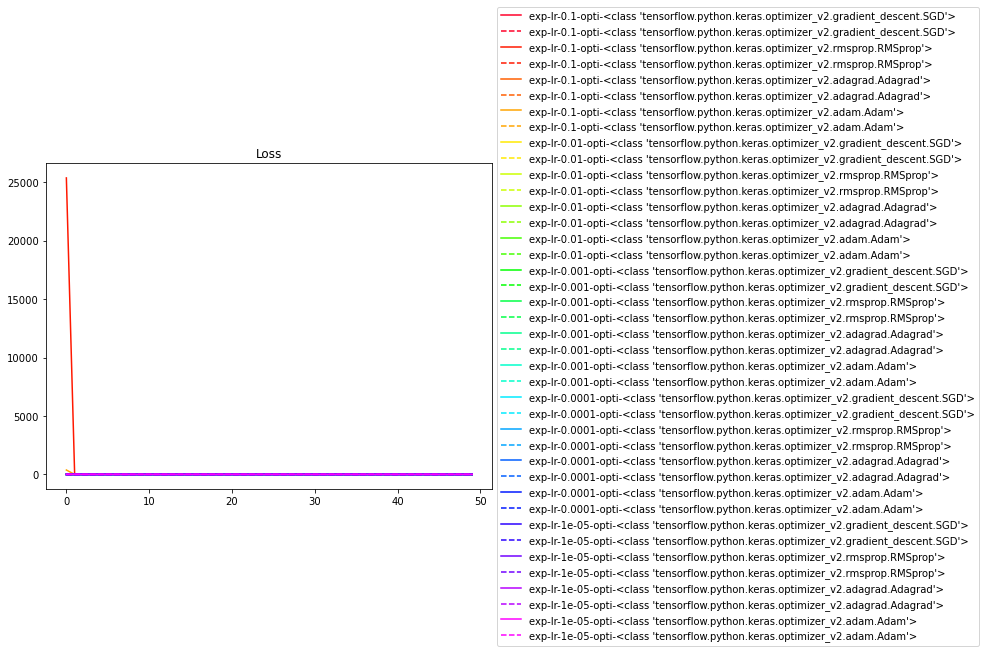

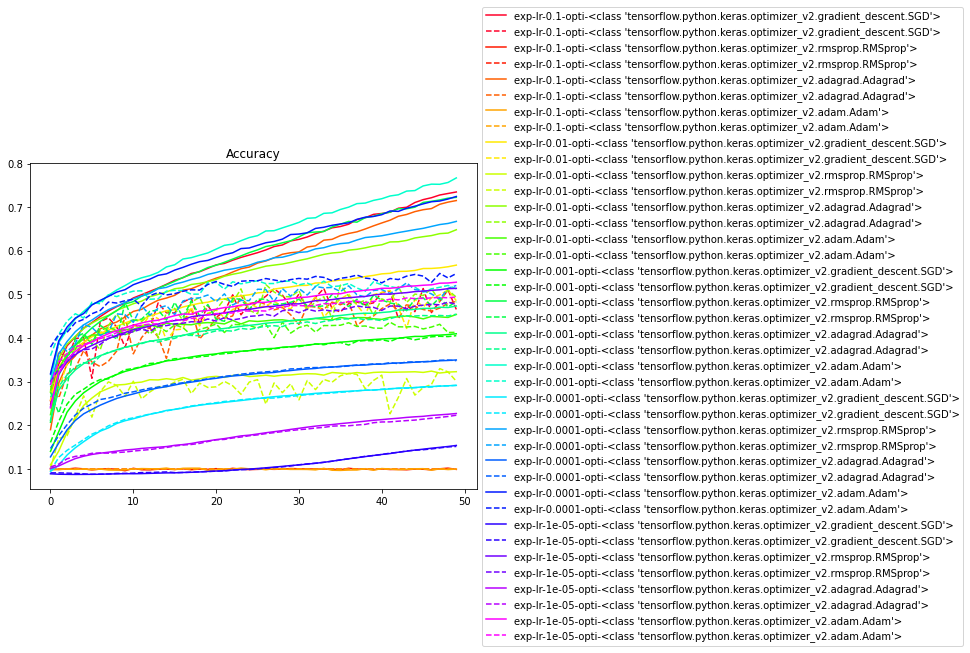

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline 
    
NUM_COLORS = len(results.keys())
cm = plt.get_cmap('gist_rainbow')
color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()